In [1]:
# Importing Step

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

<h1><center>Group 1 ASMT-08</center></h1>

<h3>Company Summary</h3>
<h6>________________________________________________________________________________________________________________________</h6>

1. Creating DataFrame and Reading in the data

2. Removing the first row from the DataFrame

3. Renaming columns and resetting the index.

In [2]:
url ='https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=2b1b51cb6cacd2a75465fb1f00658932f347374e'

response = requests.get(url)
data = json.loads(response.text)
df = pd.DataFrame.from_dict(data)

newcolumns = df.iloc[0]

df = df.iloc[1:]

df.rename(columns = newcolumns, inplace = True)

df.reset_index(inplace = True, drop = True)

4. Filtering the DataFrame to use certain columns for visualizations

In [3]:
filtered_df = df.loc[:, ['SEX_LABEL', 'ETH_GROUP_LABEL', 'EMP', 'PAYANN', 'FIRMPDEMP', 'RCPPDEMP', 'RACE_GROUP_LABEL' ]]

5. Changing certain columns datatypes

In [4]:
columns = ['EMP', 'PAYANN', 'FIRMPDEMP', 'RCPPDEMP']

for col in columns:
    filtered_df[col] = filtered_df[col].astype(float)

6. Getting the Top 50 compnaies by size for scatterplot

In [5]:
top50 = filtered_df.sort_values(by = 'EMP', ascending=False)[:50]

7. Checking if there is a correlation between number of employees and total employer firms

In [6]:
correlation = top50['EMP'].corr(top50['FIRMPDEMP'])

8. Removing an outlier for cleaner visalization

In [7]:
top50 = top50.drop(top50.index[0])

9. Setting the two columns equal to an x and y variable
10. Creating the scatterplot using those variables

In [22]:
x = top50['EMP']
y = top50['FIRMPDEMP']

11. Removing the scientific notation and assigning the scatterplot the variable ax
12. Defining a function to add commas to new notation, calling the function on both the x and y axis
13. Rotating the tickers to fit the chart and have a more cohesive feel
14. Defining and displaying a trendline on the chart

C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\AppData\Local\Temp\ipykernel_37048\1117323726.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p(x), "r--", color = 'orange')


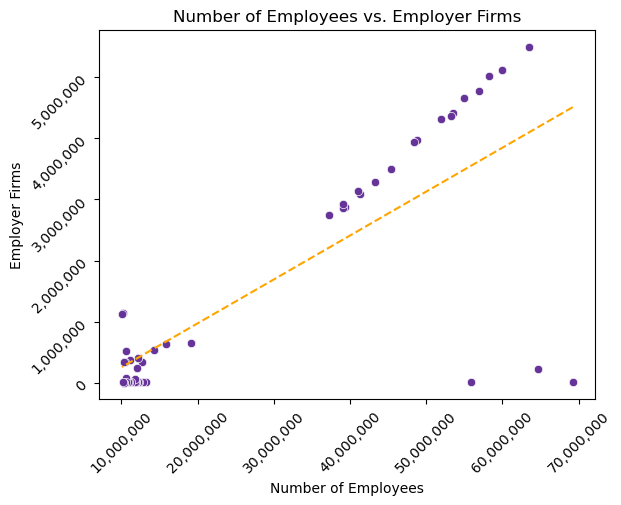

In [23]:
sns.scatterplot(x, y);

# Removing the scientific notation and assigning the scatterplot the variable ax
ax = sns.scatterplot(x, y, color = 'rebeccapurple');
ax.yaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_scientific(False)

def add_commas(x, pos):
    return '{:,}'.format(int(x))

ax.yaxis.set_major_formatter(FuncFormatter(add_commas))
ax.xaxis.set_major_formatter(FuncFormatter(add_commas))

ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--", color = 'orange')

# Labeling
plt.xlabel("Number of Employees")
plt.ylabel("Employer Firms")
plt.title('Number of Employees vs. Employer Firms');

15. Creating two new DataFrames without null values for the PAYANN and EMP columns

In [10]:
all_payann = filtered_df[filtered_df["PAYANN"] != 0]
race = all_payann[all_payann["EMP"] != 0]

16. Creating an average salary column in the new DataFrame

In [11]:
race['Average_Salary'] = (race['PAYANN']/race['EMP'])*1000

C:\Users\fmcsw\AppData\Local\Temp\ipykernel_37048\3550987281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['Average_Salary'] = (race['PAYANN']/race['EMP'])*1000


17. Grouping the average salary columns by the race and getting the mean
18. Resetting index and creating a new column, renaming columns as well
19. Rounding the average salary column and then casting as an int

In [12]:
payroll_by_race = race.groupby("RACE_GROUP_LABEL")["Average_Salary"].mean()

payroll_df = payroll_by_race.reset_index()

payroll_df = payroll_df.rename(columns={"RACE_GROUP_LABEL": "Race"})

payroll_df["Average_Salary_Rounded"] = payroll_df["Average_Salary"].round(0)
payroll_df["Average_Salary_Rounded"] = payroll_df["Average_Salary_Rounded"].astype(int)

20. Making finalized DataFrame to use in visualizations

In [13]:
average_payroll = payroll_df[['Race', 'Average_Salary_Rounded']]
average_payroll = average_payroll.rename(columns={"Average_Salary_Rounded": "Average_Salary"})
average_payroll = average_payroll.sort_values(by='Average_Salary')

21. Removing the totals, classifiable, and unclassifiable rows
22. Setting the size of the chart and displaying the value at the end of the bars

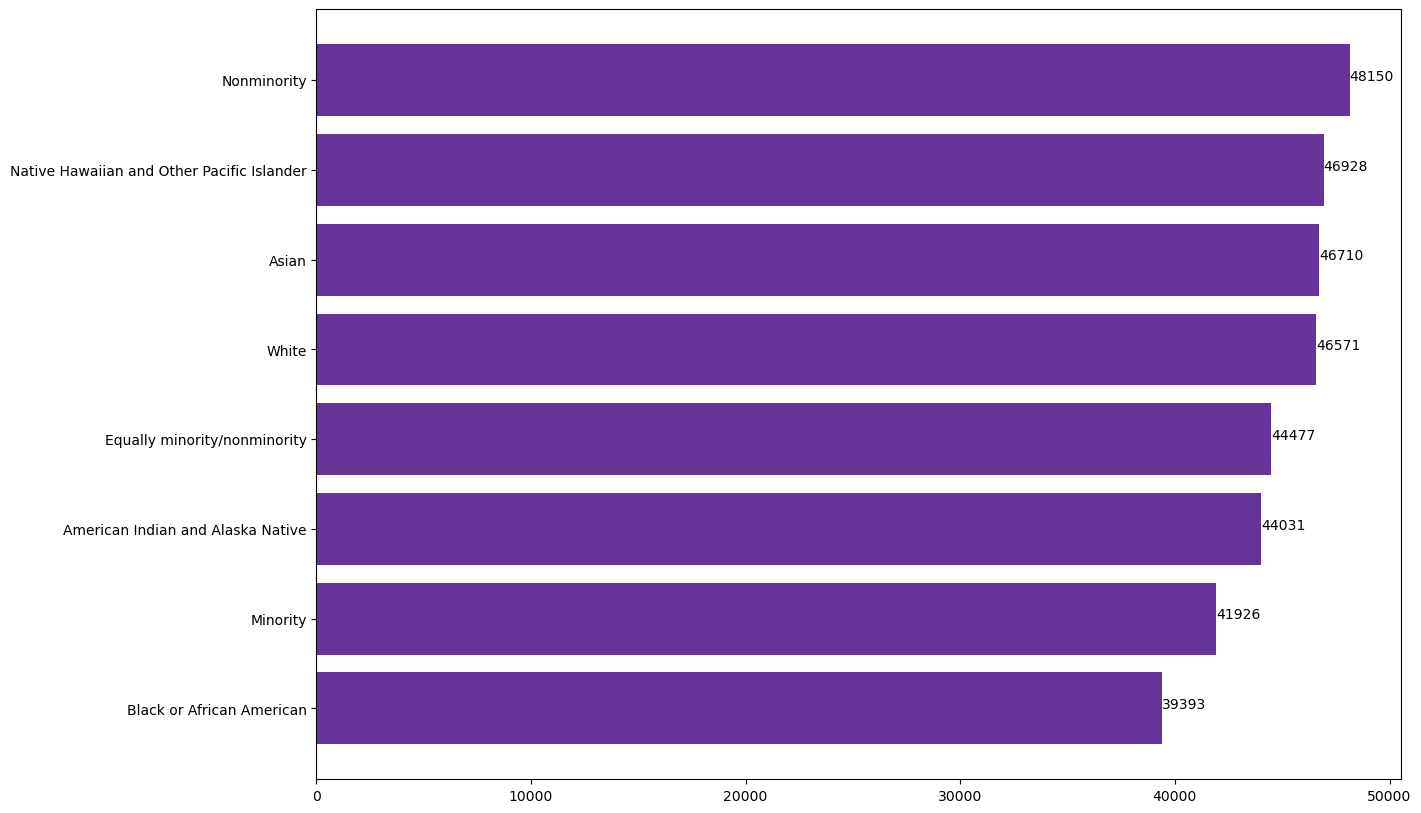

In [14]:
average_payroll = average_payroll[average_payroll["Race"].isin(["American Indian and Alaska Native", "Asian", "Black or African American", 'Equally minority/nonminority', 'Minority', 'Native Hawaiian and Other Pacific Islander', 'Nonminority', 'White'])]

plt.figure(figsize=(14, 10))

x = average_payroll['Race']
y = average_payroll['Average_Salary']
# Create the bar chart
plt.barh(x, y, color = 'rebeccapurple');

for i, v in enumerate(y):
    plt.text(v, i, str(v))

In [16]:
top50['Average_Salary'] = (top50['PAYANN']/top50['EMP'])*1000

In [17]:
correlation = top50['EMP'].corr(top50['Average_Salary'])

23. Removing the scientific notation and assigning the scatterplot the variable ax
24. Defining a function to add commas to new notation, calling the function on both the x and y axis
25. Rotating the tickers to fit the chart and have a more cohesive feel
26. Defining and displaying a trendline on the chart

C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\AppData\Local\Temp\ipykernel_37048\2432759844.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p(x), "r--", color = 'orange')


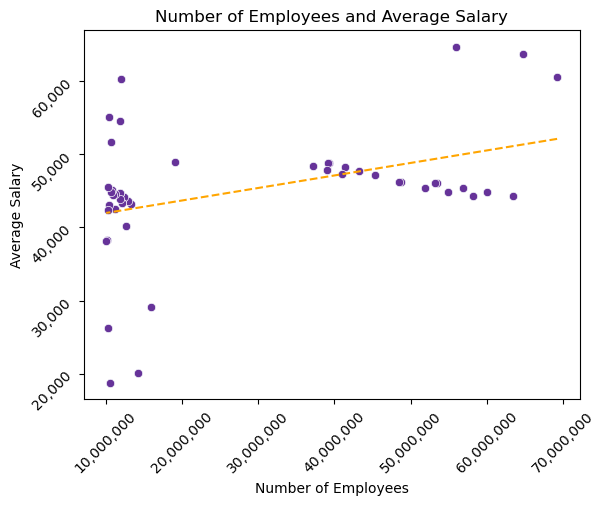

In [21]:
x = top50['EMP']
y = top50['Average_Salary']

sns.scatterplot(x, y);

# Removing the scientific notation and assigning the scatterplot the variable ax
ax = sns.scatterplot(x, y, color = 'rebeccapurple');
ax.yaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_scientific(False)

def add_commas(x, pos):
    return '{:,}'.format(int(x))

ax.yaxis.set_major_formatter(FuncFormatter(add_commas))
ax.xaxis.set_major_formatter(FuncFormatter(add_commas))

ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--", color = 'orange')

# Labeling
plt.xlabel("Number of Employees")
plt.ylabel("Average Salary")
plt.title('Number of Employees and Average Salary');

<h3>Characteristics of Business</h3>
<h6>________________________________________________________________________________________________________________________</h6>

1 Define Api Key and Url for API Call

In [49]:
API_KEY = 'aab1e866e5e8fb6435294519ffa9d348d2ee0caf'
BASE_URL = 'https://api.census.gov/data/'

2 API Call to extract data from all 4 datasets

In [50]:
queries_business_characteristics  = [
    "NAME","GEO_ID","FIRMPDEMP"
]
data_business_characteristics  = requests.get(BASE_URL + '2018/abscb?get='+ ','.join(queries_business_characteristics ) +'&for=state:*&key=' + API_KEY).json()

In [51]:
queries_business_summary = [
    "GEO_ID","NAME","NAICS2017","NAICS2017_LABEL","SEX","SEX_LABEL","ETH_GROUP","ETH_GROUP_LABEL","RACE_GROUP","RACE_GROUP_LABEL","VET_GROUP","VET_GROUP_LABEL","EMPSZFI","EMPSZFI_LABEL","YEAR","FIRMPDEMP","FIRMPDEMP_F","EMP","EMP_F","PAYANN","PAYANN_F","FIRMPDEMP_S","FIRMPDEMP_S_F","EMP_S","EMP_S_F","PAYANN_S","PAYANN_S_F"
]
data_business_summary = requests.get(BASE_URL + '2018/abscs?get='+ ','.join(queries_business_summary) +'&for=state:*&key=' + API_KEY).json()

In [52]:
queries_business_owners = [
    "GEO_ID","NAME","OWNER_VET","OWNER_VET_LABEL","QDESC","QDESC_LABEL","OWNCHAR","OWNCHAR_LABEL","YEAR","OWNPDEMP","OWNPDEMP_F","OWNPDEMP_PCT","OWNPDEMP_PCT_F","OWNPDEMP_S","OWNPDEMP_S_F","OWNPDEMP_PCT_S","OWNPDEMP_PCT_S_F"
]
data_business_owners = requests.get(BASE_URL + '2018/abscbo?get='+ ','.join(queries_business_owners) +'&for=state:*&key=' + API_KEY).json()

In [53]:
queries_tech_characteristics  = [
    "NAME","GEO_ID","NAICS2017_LABEL","TECHUSE","FIRMPDEMP"
]
data_tech_characteristics  = requests.get(BASE_URL + '2018/abstcb?get='+ ','.join(queries_tech_characteristics ) +'&for=state:*&key=' + API_KEY).json()

Check data tables

In [54]:
df_business_summary = pd.DataFrame(data_business_summary[1:], columns=data_business_summary[0])
df_business_summary.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,state
0,0400000US28,Mississippi,00,Total for all sectors,001,Total,029,Non-Hispanic,00,Total,...,g,0,S,0.0,S,0.0,S,0.0,S,28
1,0400000US28,Mississippi,00,Total for all sectors,001,Total,029,Non-Hispanic,00,Total,...,None,43830,None,44.0,None,44.5,None,43.5,None,28
2,0400000US28,Mississippi,00,Total for all sectors,001,Total,029,Non-Hispanic,00,Total,...,g,0,D,0.0,D,0.0,D,0.0,D,28
3,0400000US28,Mississippi,00,Total for all sectors,001,Total,029,Non-Hispanic,00,Total,...,c,0,D,0.0,D,0.0,D,0.0,D,28
4,0400000US28,Mississippi,00,Total for all sectors,001,Total,029,Non-Hispanic,00,Total,...,h,0,D,0.0,D,0.0,D,0.0,D,28


In [55]:
df_business_owners = pd.DataFrame(data_business_owners[1:], columns=data_business_owners[0])
df_business_owners.head()

,GEO_ID,NAME,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F,state
0,0400000US28,Mississippi,001,All owners of respondent firms,O15,PRIORBUSTAT,DIXX,Item not reported,2018,1768,None,0.0,X,17.7,None,0.0,X,28
1,0400000US28,Mississippi,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,1158,None,4.6,None,20.3,None,0.9,None,28
2,0400000US28,Mississippi,001,All owners of respondent firms,O02,YRACQBUS,CH,1980 to 1989,2018,1978,None,7.8,None,10.0,None,0.9,None,28
3,0400000US28,Mississippi,001,All owners of respondent firms,O02,YRACQBUS,CI,1990 to 1999,2018,2983,None,11.8,None,11.7,None,1.0,None,28
4,0400000US28,Mississippi,001,All owners of respondent firms,O02,YRACQBUS,CI01,2000 to 2007,2018,5251,None,20.8,None,7.0,None,1.6,None,28


In [56]:
df_tech_characteristics  = pd.DataFrame(data_tech_characteristics [1:], columns=data_tech_characteristics [0])
df_tech_characteristics.head()

,NAME,GEO_ID,NAICS2017_LABEL,TECHUSE,FIRMPDEMP,state
0,Alabama,0400000US01,Total for all sectors,T2E03B99,17448,01
1,Alabama,0400000US01,Total for all sectors,T2E03BA9,58136,01
2,Alabama,0400000US01,Total for all sectors,T3E03B04,7449,01
3,Alabama,0400000US01,Total for all sectors,T3E03B01,30912,01
4,Alabama,0400000US01,Total for all sectors,T3E03B02,253,01


In [57]:
df_business_characteristics  = pd.DataFrame(data_business_characteristics [1:], columns=data_business_characteristics [0])
df_business_characteristics.head()

,NAME,GEO_ID,FIRMPDEMP,state
0,Mississippi,0400000US28,40856,28
1,Missouri,0400000US29,106753,29
2,Montana,0400000US30,31661,30
3,Nebraska,0400000US31,43189,31
4,Nevada,0400000US32,51758,32


Transform data to correct data types

In [58]:
df_business_summary['FIRMPDEMP'] = df_business_summary['FIRMPDEMP'].astype(int)
df_business_summary['EMP'] = df_business_summary['EMP'].astype(int)
df_business_summary['PAYANN'] = df_business_summary['PAYANN'].astype(int)
df_business_summary['FIRMPDEMP_S'] = df_business_summary['FIRMPDEMP_S'].astype(float)
df_business_summary['EMP_S'] = df_business_summary['EMP_S'].astype(float)
df_business_summary['PAYANN_S'] = df_business_summary['PAYANN_S'].astype(float)
df_business_summary['YEAR'] = df_business_summary['YEAR'].astype(int)
df_business_summary['state'] = df_business_summary['state'].astype(int)

In [59]:
df_business_characteristics['FIRMPDEMP'] = df_business_characteristics['FIRMPDEMP'].astype(int)
df_business_characteristics['state'] = df_business_characteristics['state'].astype(int)


In [60]:
df_business_owners["OWNPDEMP"] = df_business_owners["OWNPDEMP"].astype(int)
df_business_owners["OWNPDEMP_PCT"] = df_business_owners["OWNPDEMP_PCT"].astype(float)
df_business_owners["OWNPDEMP_PCT_S"] = df_business_owners["OWNPDEMP_PCT_S"].astype(float)
df_business_owners["state"] = df_business_owners["state"].astype(int)

In [61]:
df_tech_characteristics['FIRMPDEMP'] = df_tech_characteristics['FIRMPDEMP'].astype(int)
df_tech_characteristics['state'] = df_tech_characteristics['state'].astype(int)

query: What percentage of business owners are veterans?

In [62]:
# what percentage of business owners are
total_number_of_business_owners = df_business_owners['OWNER_VET'].value_counts()
print('The percentage of business owners who are veterans is: ', round((total_number_of_business_owners[1]/total_number_of_business_owners[0])*100,4), '%')

The percentage of business owners who are veterans is:  10.0204 %


In [22]:
# plot the data as pie chart
# labels = 'Veterans', 'Non-Veterans'
# sizes = [total_number_of_business_owners[1], total_number_of_business_owners[0]]
# explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

Query: What is the average salary of employees per state?

group by state and get the average salary

In [63]:

temp_df = df_business_summary.drop(df_business_summary[df_business_summary['EMP'] == 0].index)
temp_df['average_salary'] = temp_df['PAYANN']/temp_df['EMP']

average_salary_by_state = temp_df.groupby('NAME')['average_salary'].mean()
average_salary_by_state

NAME
Alabama                 40.066704
Alaska                  56.125747
Arizona                 41.966616
Arkansas                38.038671
California              52.198646
Colorado                47.431065
Connecticut             55.660277
Delaware                46.882807
District of Columbia    66.700950
Florida                 40.588013
Georgia                 42.038265
Hawaii                  45.244867
Idaho                   36.225863
Illinois                46.018056
Indiana                 39.801669
Iowa                    38.835287
Kansas                  39.641514
Kentucky                36.500170
Louisiana               41.317359
Maine                   40.361388
Maryland                50.784815
Massachusetts           57.703088
Michigan                43.451162
Minnesota               44.823296
Mississippi             33.873282
Missouri                40.535816
Montana                 36.868759
Nebraska                41.340974
Nevada                  45.913230
New Hamps

Plot data to bar graph using seaborne

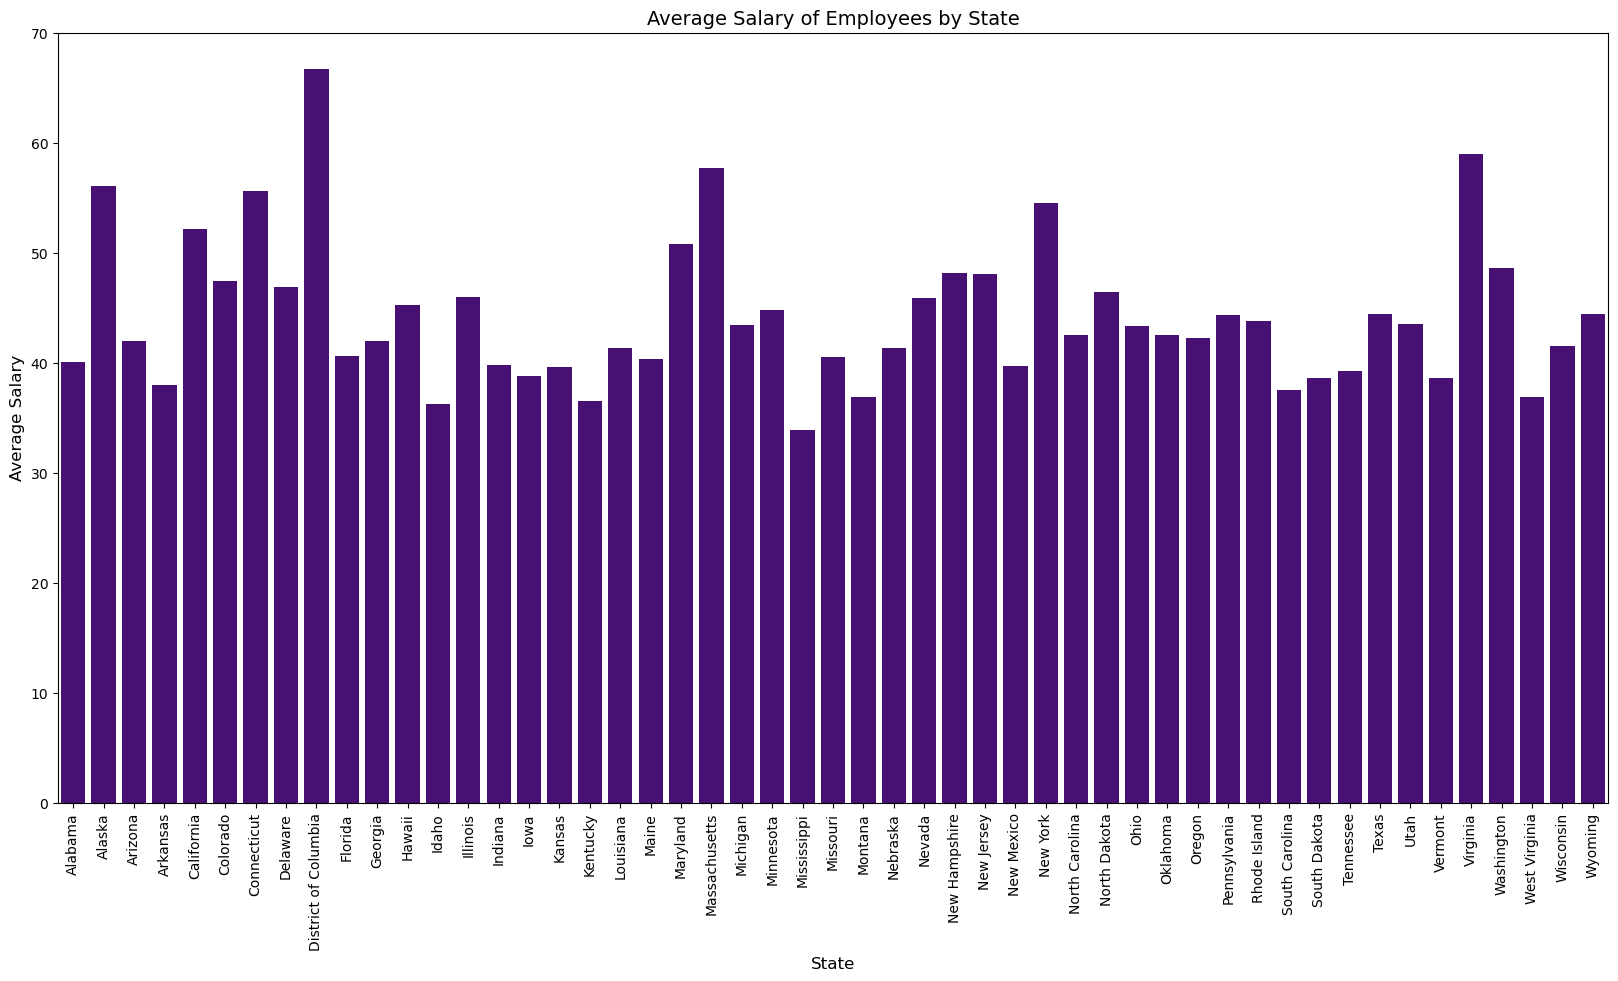

In [64]:
# plot the data using seaborn
plt.figure(figsize=(20,10))
sns.barplot(x=average_salary_by_state.index, y=average_salary_by_state.values, color = 'indigo')
plt.xticks(rotation=90)
plt.title('Average Salary of Employees by State', size =14)
plt.xlabel('State', size = 12)
plt.ylabel('Average Salary', size = 12);
plt.show()

Query: For each state, what percentage of total workers belong to each ethnicity?

Remove the native total value

In [65]:
 
eth_group_count = df_business_summary.groupby('NAME')['ETH_GROUP_LABEL'].value_counts()
eth_group_count.unstack().fillna(0)
# remove the total values
eth_group_count = eth_group_count.drop(eth_group_count[eth_group_count.index.get_level_values(1) == 'Total'].index)

Calculate new total value from data and calculate percentages.

In [66]:
# store the total row in a variable
states_total = eth_group_count.unstack().fillna(0).sum(axis=1)
# calculate the percentage
eth_group_count.unstack().fillna(0).div(states_total, axis=0).mul(100).round(2)

ETH_GROUP_LABEL,Non-Hispanic,Hispanic,Classifiable,Unclassifiable,Equally Hispanic/non-Hispanic
NAME,,,,,
Alabama,51.71,20.06,10.92,9.13,8.18
Alaska,56.60,15.68,11.65,10.34,5.73
Arizona,43.96,24.00,9.03,8.13,14.88
Arkansas,52.16,17.84,11.08,10.37,8.54
California,39.96,29.04,7.41,7.02,16.56
Colorado,44.69,23.56,8.95,8.45,14.34
Connecticut,50.06,20.77,10.78,9.20,9.20
Delaware,53.74,16.97,11.55,9.23,8.52
District of Columbia,52.66,19.14,10.99,9.95,7.26


Plot data as bar graph

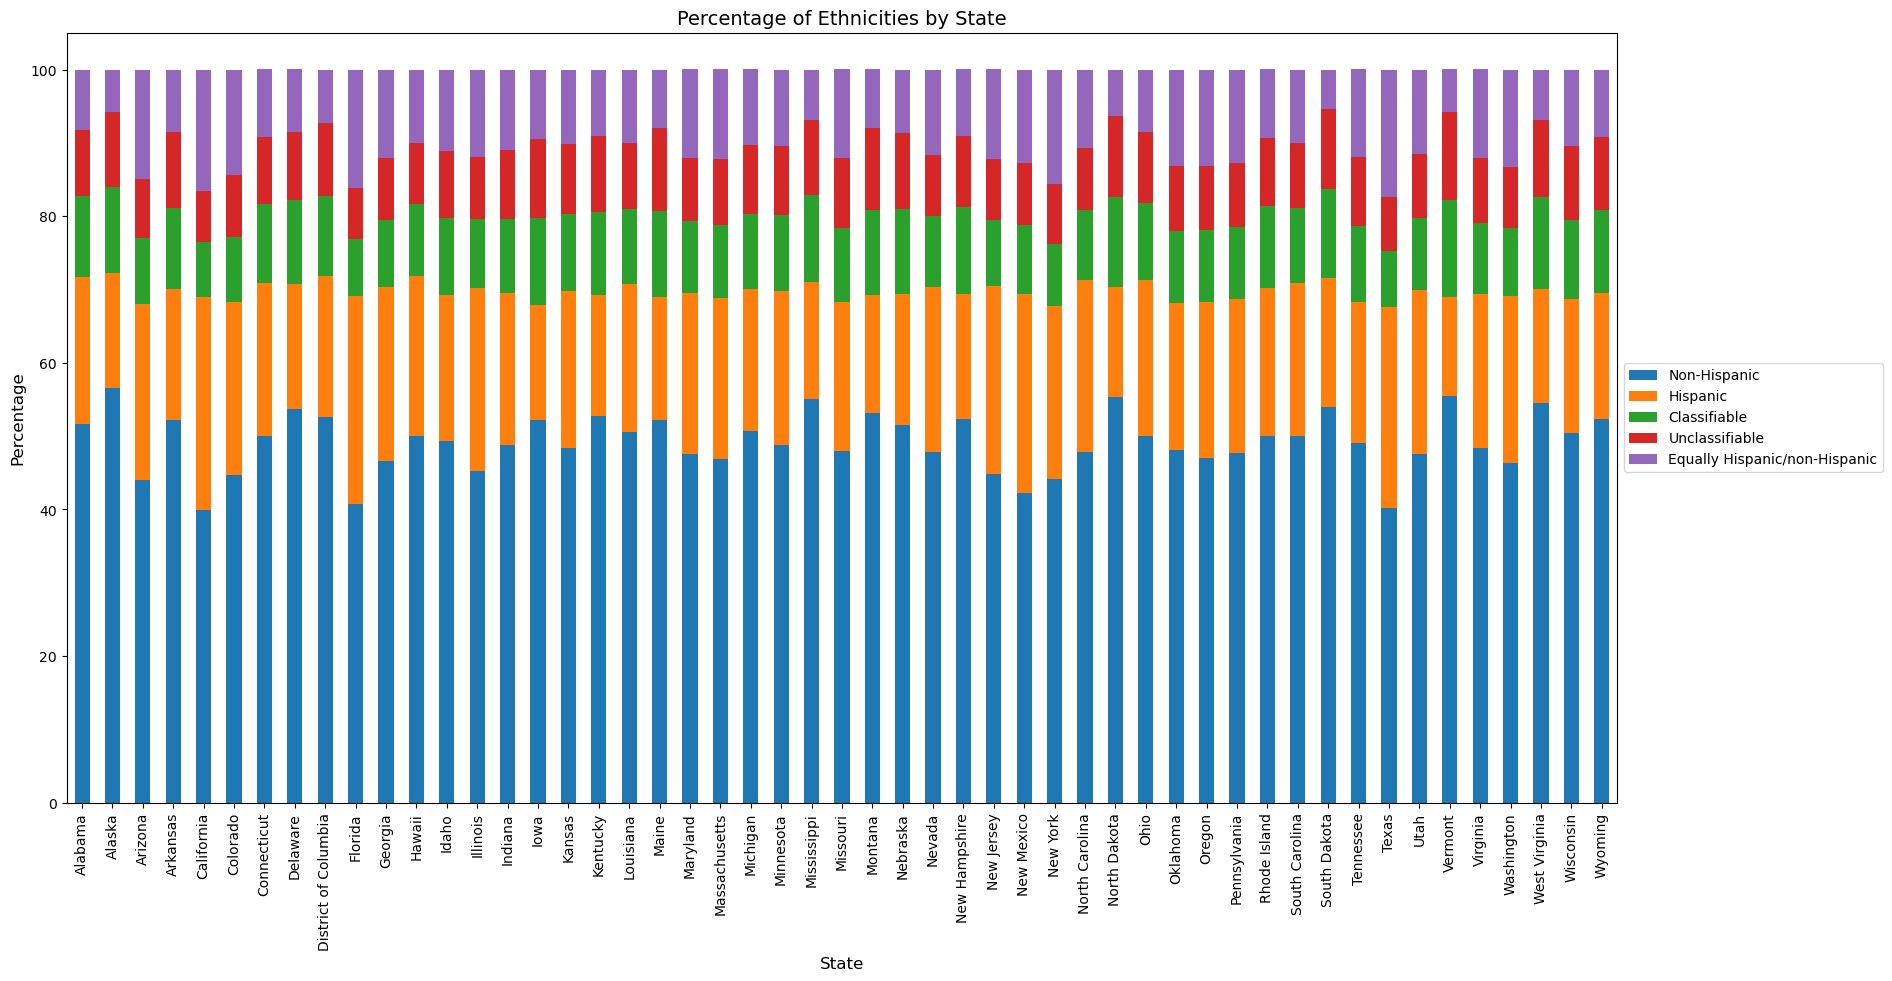

In [67]:

eth_group_count.unstack().fillna(0).div(states_total, axis=0).mul(100).round(2).plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Percentage of Ethnicities by State', size =14)
plt.xlabel('State', size = 12)
plt.ylabel('Percentage', size = 12);
plt.show()

query: Percentage of male and female employees per state

In [128]:
# 5. The percentage of male and female employees for each state.
gender_group_count = df_business_summary["SEX_LABEL"].value_counts()
gender_group_count

Total                  139124
Male                    42283
Female                  31038
Equally male/female     30548
Classifiable             9690
Unclassifiable           8714
Name: SEX_LABEL, dtype: int64

group the number males and females per state

In [129]:

gender_group_count = df_business_summary.groupby('SEX_LABEL')['NAME'].value_counts()
gender_group_count = gender_group_count.unstack().fillna(0).T
total_gender_count = gender_group_count['Total'] - gender_group_count['Classifiable'] - gender_group_count['Unclassifiable']
male_count = gender_group_count['Male'] + gender_group_count['Equally male/female']
female_count = gender_group_count['Female'] + gender_group_count['Equally male/female']

In [132]:
percent_males = male_count/total_gender_count
percent_females = female_count/total_gender_count
# print(f"The percentage of males is: {round(percent_males.mean()*100,2)}%")
# print(f"The percentage of females is: {round(percent_females.mean()*100,2)}%")

plot the data as pie chart

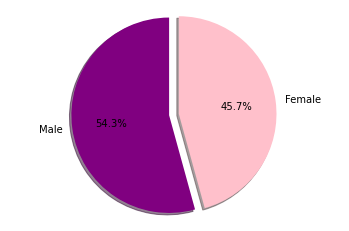

In [137]:

labels = 'Male','Female'
sizes = [percent_males.mean(), percent_females.mean()]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['purple', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<h3>Characteristics of Business Owners</h3>
<h6>________________________________________________________________________________________________________________________</h6>

1. Used API key to get information from the following url

In [136]:
url3 = 'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*&QDESC_LABEL=YRACQBUS&key=&key=1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
response3 = requests.get(url3)

2. Loaded the data into a json file

In [137]:
data3 = json.loads(response3.text)

3. Turned json file into a dictionary and then converted it to a dataframe 

In [138]:
charbizowner = pd.DataFrame.from_dict(data3)

4. Made the first row the column names

In [139]:
charbizowner.columns = charbizowner.iloc[0]

5. Removed the first row from the dataframe

In [140]:
charbizowner = charbizowner.drop(0, axis = 0)

6. Reset the index 

In [141]:
charbizowner.reset_index(inplace = True)

7. Dropped index column 

In [142]:
charbizowner = charbizowner.drop('index', axis = 1)

8. Made the numeric values integer or float with to_numeric

In [143]:
charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)

9. Put the column names into lower case so they would be easier to work with

In [144]:
charbizowner.columns = charbizowner.columns.str.lower()

10. Renamed columns with clearer names since original were vague

In [145]:
charbizowner.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners',
    'naics2017_label': 'industry_label',
    'naics2017' : 'industry'
}, inplace = True)

11. Removed flagged values

In [146]:
charbizowner = charbizowner[(charbizowner['ownpdemp_pct_f'] != 'X') & (charbizowner['ownpdemp_pct_f'] != 'D')]

12. Removed 'Total for all sectors' from the industry_label column so that I could focus on each industry

In [147]:
charbizowner = charbizowner[charbizowner['industry_label'] != 'Total for all sectors']

13. Filtered data to get the total number of owners per industry

In [148]:
industry_totals = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting')]

14. Grouped by industry and used sum to get the total number of owners by industry 

In [149]:
industry_totals = industry_totals.groupby(['industry_label'], as_index=False)["number_owners"].sum()

15. Sorted the values so the bars would be in order 

In [150]:
industry_totals = industry_totals.sort_values('number_owners', ascending = False)

In [151]:
industry_totals

,industry_label,number_owners
14,"Professional, scientific, and technical services",649104
4,Construction,540882
16,Retail trade,463581
7,Health care and social assistance,410688
0,Accommodation and food services,370173
13,Other services (except public administration),272035
1,Administrative and support and waste managemen...,241567
19,Wholesale trade,237516
15,Real estate and rental and leasing,236880
11,Manufacturing,191367


16. Shortened the industry label so the data label wouldn't be so long on the graph

In [152]:
industry_totals = industry_totals.replace('Administrative and support and waste management and remediation services','Administrative, support, and waste management services')

17. Created bar graph of 'Number of Owners by Industry'

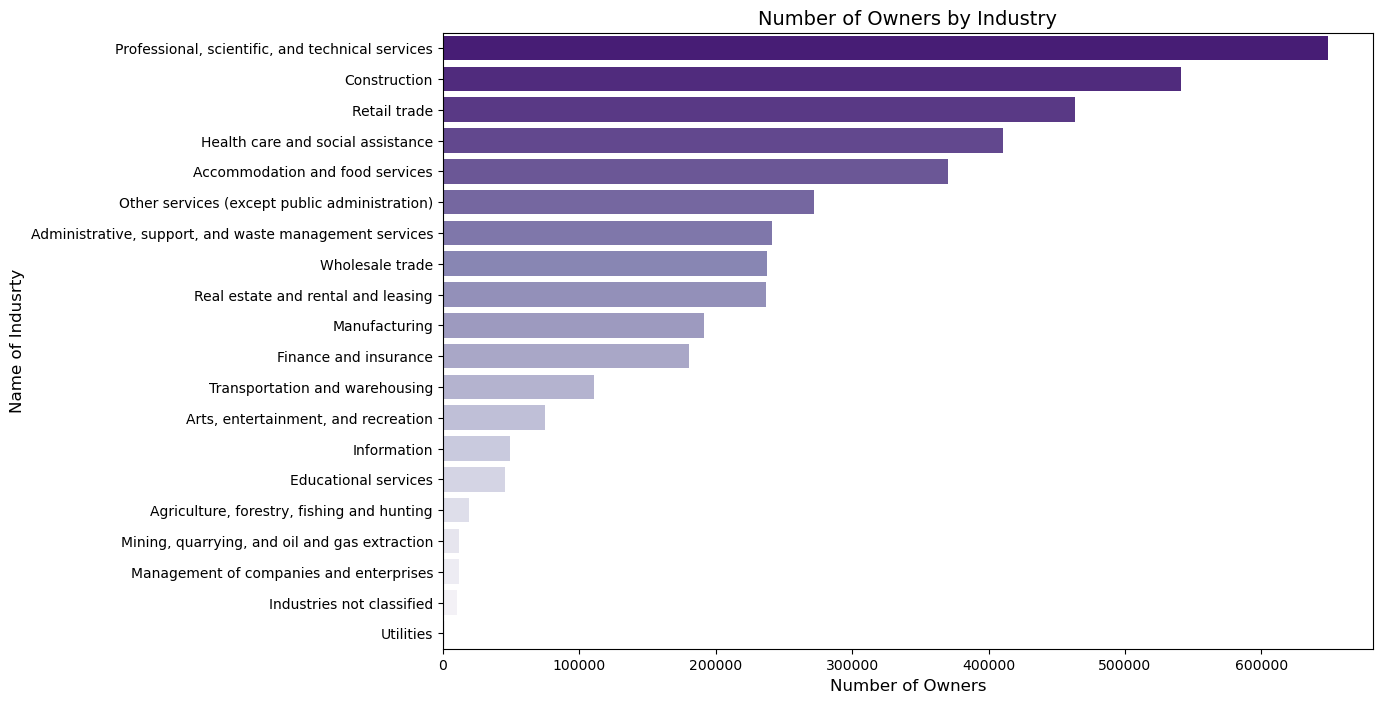

In [153]:
# Set figure size
plt.figure(figsize=(12,8))
# Created graph, set axes and color palette
sns.barplot(y=industry_totals['industry_label'], x = industry_totals['number_owners'], palette = 'Purples_r')
# Set axes labels and title 
plt.title('Number of Owners by Industry', size = 14)
plt.xlabel('Number of Owners', size = 12)
plt.ylabel('Name of Indusrty', size = 12);

18. Filtered data to get the total number of male vs female owners

In [154]:
male_vs_female = charbizowner[(charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & (charbizowner['owner_sex_label'] != 'All owners of respondent firms')]

19. Grouped by sex and used sum to get the total for number of male and number of female owners

In [155]:
male_vs_female = male_vs_female.groupby(['owner_sex_label'], as_index=False)["number_owners"].sum()

In [156]:
male_vs_female

,owner_sex_label,number_owners
0,Female,1274666
1,Male,2854230


20. Created a pie chart to compare the two values as percents 

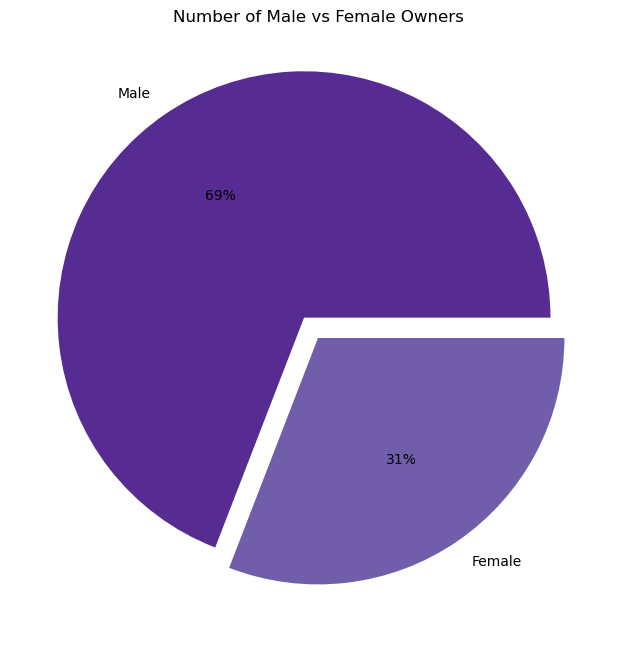

In [157]:
# Set the two data values
data = [2854230, 1274666]
# Set the two data labels 
labels = ['Male','Female']
# Set the color palette
colors = sns.color_palette('Purples_r')
# Set explode so that the portions would pop out
explode = (0.1, 0)
# Set figure size
plt.figure(figsize=(12,8))
# Created the pie chart
plt.pie(data, explode = explode, labels = labels, colors = colors, autopct='%.0f%%')
# Set title
plt.title('Number of Male vs Female Owners', size = 12)
plt.show()

21. Used API key to request data by state

In [158]:
API_KEY = '1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
BASE_URL = 'https://api.census.gov/data/'

queries_business_owners = [
    "GEO_ID","NAME","OWNER_SEX","OWNER_SEX_LABEL","QDESC","QDESC_LABEL","OWNCHAR","OWNCHAR_LABEL","YEAR","OWNPDEMP","OWNPDEMP_F","OWNPDEMP_PCT","OWNPDEMP_PCT_F","OWNPDEMP_S","OWNPDEMP_S_F","OWNPDEMP_PCT_S","OWNPDEMP_PCT_S_F"
]
charbizowner_state = requests.get(BASE_URL + '2018/abscbo?get='+ ','.join(queries_business_owners) +'&for=state:*&key=' + API_KEY).json()

22. Converted json file into a dictionary and loaded it into a dataframe

In [159]:
charbizowner_state = pd.DataFrame(charbizowner_state[1:], columns=charbizowner_state[0])

23. Converted the columns with numbers to integer data type

In [160]:
charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)

24. Changed the headers so that they are in lowercase

In [161]:
charbizowner_state.columns = charbizowner_state.columns.str.lower()

25. Changed the header names so that they are clearer 

In [162]:
charbizowner_state.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners',
    'naics2017_label': 'industry_label',
    'naics2017' : 'industry'
}, inplace = True)

26. Removed flagged data so that the totals would be more accurate

In [163]:
charbizowner_state = charbizowner_state[(charbizowner_state['ownpdemp_pct_f'] != 'X') & (charbizowner_state['ownpdemp_pct_f'] != 'D')]

27. Filtered data to focus on education and excluded total reporting

In [164]:
charbizowner_state_educ = charbizowner_state[(charbizowner_state['qdesc_label'] == 'EDUC') & (charbizowner_state['ownchar_label'] != 'Total reporting')]

28. Grouped by education (bachelor's, master's, high school/GED) to get the mean value across all states

In [165]:
result = charbizowner_state_educ.groupby(['ownchar_label'])['number_owners'].mean().reset_index().sort_values('number_owners', ascending = False)

29. Created a horizontal bar graph for state average education level 

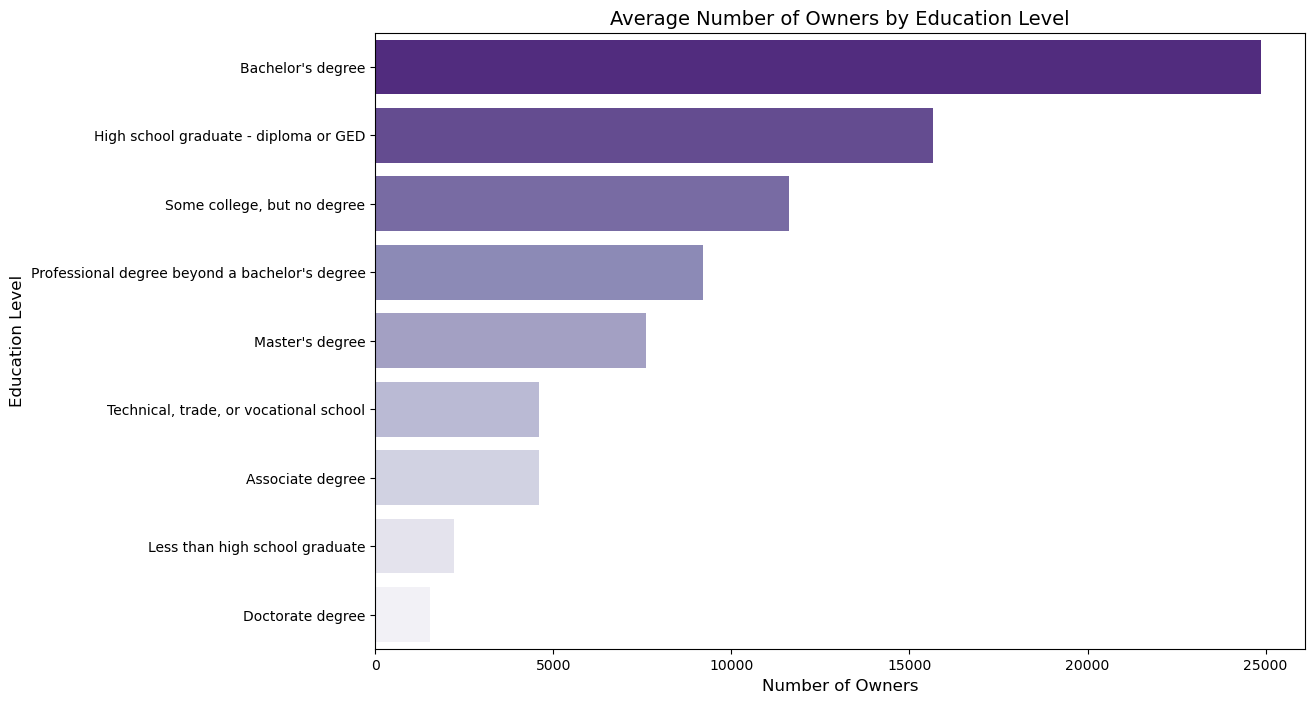

In [166]:
# Set figure size
plt.figure(figsize = (12, 8))
# Created horizontal bar graph and set color palette
sns.barplot(y=result['ownchar_label'], x = result['number_owners'], palette = 'Purples_r')

# Set title and axes labels 
plt.title('Average Number of Owners by Education Level', size = 14)
plt.xlabel('Number of Owners', size = 12)
plt.ylabel('Education Level', size = 12);

30. Filtered data even more to focus on Bachelor's since that is what business owners are more likely to have 

In [167]:
bachelors = charbizowner_state_educ[(charbizowner_state_educ['ownchar_label'] == "Bachelor's degree")]

31. Grouped by state and summed number of owners to get the total

In [168]:
bachelors = bachelors.groupby(['name'], as_index=False)["number_owners"].sum()

32. Sorted values so that the bars would be in order

In [169]:
bachelors = bachelors.sort_values('number_owners', ascending = False)

33. Created graph of 'Number of Owners with Bachelor's Degrees by State'

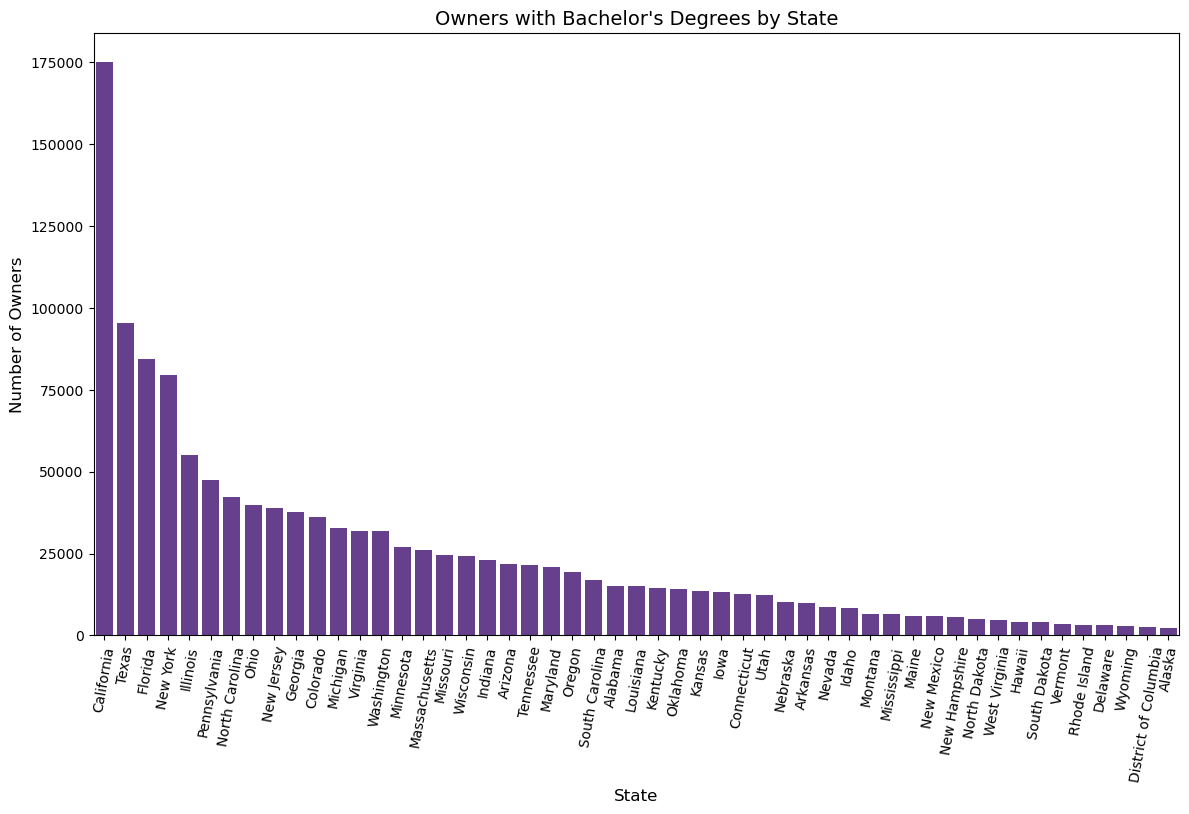

In [170]:
# Set figure size 
plt.figure(figsize = (12, 8))
# Bar graph
sns.barplot(x=bachelors['name'], y = bachelors['number_owners'], color = 'rebeccapurple')
# Rotate x-axis data labels 
plt.xticks(rotation = 80)
# Add padding to the graph 
plt.tight_layout()
# Set title and axes labels 
plt.title("Owners with Bachelor's Degrees by State", size = 14)
plt.xlabel('State', size = 12)
plt.ylabel('Number of Owners', size = 12);

<h3>Technology Characteristics of Businesses</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [1]:
#import necessary libraries
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



1.	Call the following URL containing desired data with a personal API key. 
https://api.census.gov/data/2018/abstcb?get=NAICS2017,NAICS2017_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,FIRMPDEMP_F,EMP,PAYANN,PAYANN_F&for=us&key={PERSONAL-KEY} 

In [2]:
key = '2b1b51cb6cacd2a75465fb1f00658932f347374e'
urltech= f'https://api.census.gov/data/2018/abstcb?get=NAICS2017,NAICS2017_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,FIRMPDEMP_F,EMP,PAYANN,PAYANN_F&for=us&key={key}'
response4 = requests.get(urltech)

2.	Load the data into a json file called *tech*. 

In [3]:
tech = json.loads(response4.text)

3.	Convert tech into a dictionary and load into a pandas DataFrame called *techchar*.

In [4]:
techchar = pd.DataFrame.from_dict(tech)

At this point the column names appear on the second row. To promote the second row into column names follow steps 4-7:

4. Create a pandas Series called *newcolumns4* that grabs the second row only. 

In [5]:
newcolumns4 = techchar.iloc[0]

5.	Remove the first row from the *techchar* DataFrame.

In [6]:
techchar = techchar.iloc[1:]

6.	Rename the columns using the rename method and setting *columns* equal to *newcolumns4*.

In [7]:
techchar.rename(columns=newcolumns4, inplace=True)

7.	Reset the index 

In [8]:
techchar.reset_index(inplace = True)

8.	Ensure all numeric columns are converted from object to their appropriate numeric type.

In [9]:
techchar[['FIRMPDEMP','EMP','PAYANN']] = techchar[['FIRMPDEMP','EMP','PAYANN']].apply(pd.to_numeric)

9.	Create a copy of the DataFrame called *techuses*.

In [10]:
techuses= techchar.copy()

10.	Dropped rows where  *NAICS2017_LABEL* equals *Total for all sectors*.

In [11]:
indexNA = techuses[(techuses['NAICS2017_LABEL'] == 'Total for all sectors')].index
techuses.drop(indexNA , inplace=True)

11.	 Drop the unnecessary columns *NAICS2017*, *us* and *TECHUSE*.

In [12]:
techuses= techuses.drop(['NAICS2017','us','TECHUSE'], axis=1)

12.	Rename the columns to more meaningful names. 

In [13]:
techuses.rename(columns={'NAICS2017_LABEL':'Industry','PAYANN':'Annual Payroll','EMP':'Number of Employees','TECHUSE_LABEL':'Tech Use','FIRMPDEMP':'Number of firms'}, inplace=True)

13. To easily obtain the different levels of use for each particular technology, split column *Tech Use* into two columns named *Technology Used* and *Level of Use*. 

In [14]:
techuses[['Technology Used','Level of Use']] = techuses['Tech Use'].str.split(': ', expand=True)

14.	Drop column *Tech Use*.

In [15]:
techuses= techuses.drop(['Tech Use'], axis=1)

15.	Under the column *Level of Use*, the rows containing *Total use* and *Total reporting* seem to be similar data containing the totals; therefore, they are filtered out of the DataFrame. The rows containing 'Don't Know' do not contribute useful information to our visualizations, hence they are excluded as well using the ~ isin( ) method.  

In [16]:
techuses= techuses.loc[~techuses['Level of Use'].isin(['Total use','Total Reporting',"Don't know"])]

16.	Add a column named *Average Salary* that takes the *Annual Payroll* and divides it by the *Number of Employees*.  

In [19]:
techuses['Average Salary']= (techuses['Annual Payroll']/techuses['Number of Employees'])*1000

Annual payroll’s that amount to 0 appear flagged under *PAYANN_F*. Data was not collected for these rows to avoid disclosing data for individual companies or the estimate does not meet publication standards. 

17. Drop the rows that are flagged S or D under *PAYANN_F*.

In [20]:
indexPAY = techuses[(techuses['PAYANN_F'] == 'S') | (techuses['PAYANN_F'] == 'D')].index
techuses.drop(indexPAY , inplace=True)

18.	Drop null values for *Average Salaries*.

In [21]:
techuses= techuses.dropna(subset = ['Average Salary'])

We want to drill down on the software-based technologies *Artificial Intelligence*, *Cloud-Based*, and *Specialized Software*. 

19. Create new DataFrames that only take the specified technologies from the column *Technology Used*. Name the DataFrames ai, cloud, and software respectively. 

In [22]:
software= techuses[techuses['Technology Used'] == 'Specialized Software']
ai= techuses[techuses['Technology Used']== 'Artificial Intelligence']
cloud= techuses[techuses['Technology Used'] == 'Cloud-Based']


20.	Create a new Dataframe called *firmtech* that only takes in the desired columns *Industry*, *Technology Used*, *Level of Use*, and *Number of firms*. 

In [23]:
firmtech= techuses[['Industry','Technology Used','Level of Use','Number of firms']].copy()

21.	To gather the breakdown of salaries for industries that work with AI. Group *Technology Used*, *Industry*, and *Average Salary* from the ai DataFrame. Call it group_tech. 

In [24]:
group_tech= ai.groupby(['Technology Used','Industry'])['Average Salary'].mean()


22.	Create a numpy.ndarray named *ai_industry* which gathers the unique values for *Industry* from the *ai* DataFrame.

In [25]:

ai_industry= ai['Industry'].unique()


 23.	Sort *ai_industry*.

In [26]:

ai_industry.sort()

24.	Create and transpose a new DataFrame named *Payroll_ai* which takes in a list of the *group_tech* and ai_industry. 

In [27]:
Payroll_ai= (pd.DataFrame([list(group_tech),ai_industry])).T


25.	Rename columns 0 and 1 into *Average Salary* and *Industry*, respectively. 

In [28]:

Payroll_ai = Payroll_ai.rename({0: 'Average Salary', 1: 'Industry'}, axis=1)

26.	Sort values for *Payroll_ai* by *Average Salary*.

In [29]:

Payroll_ai.sort_values(by='Average Salary', ascending=False, inplace=True)

<h5>What technologies are mostly used by employer firms?<h5>

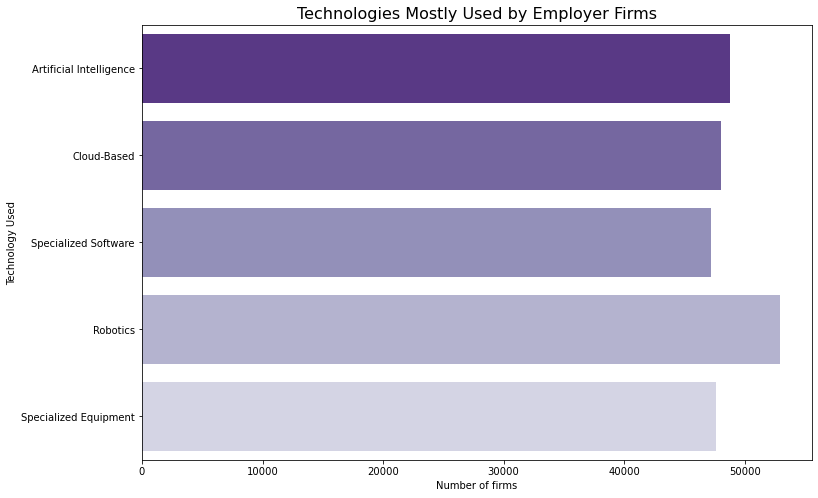

In [30]:
sns.set_palette(palette= 'Purples_r')
plt.figure(figsize= (12,8))
sns.barplot(y= firmtech['Technology Used'], x=firmtech['Number of firms'], data=firmtech, ci=None);
plt.title('Technologies Mostly Used by Employer Firms', size= 16);
plt.show()

<h5>What is the salary range for jobs that require varying levels of use of software-based technology?<h5>

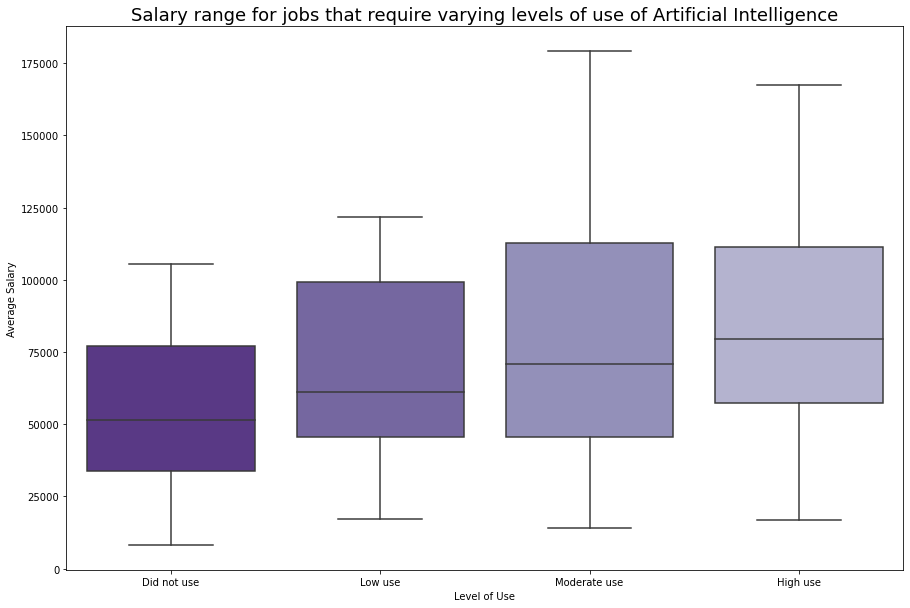

In [31]:
plt.figure(figsize=(15,10))
sns.set_palette(palette= 'Purples_r')
ai_plot= sns.boxplot(x='Level of Use', y='Average Salary', data= ai, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Salary range for jobs that require varying levels of use of Artificial Intelligence', size= 18);

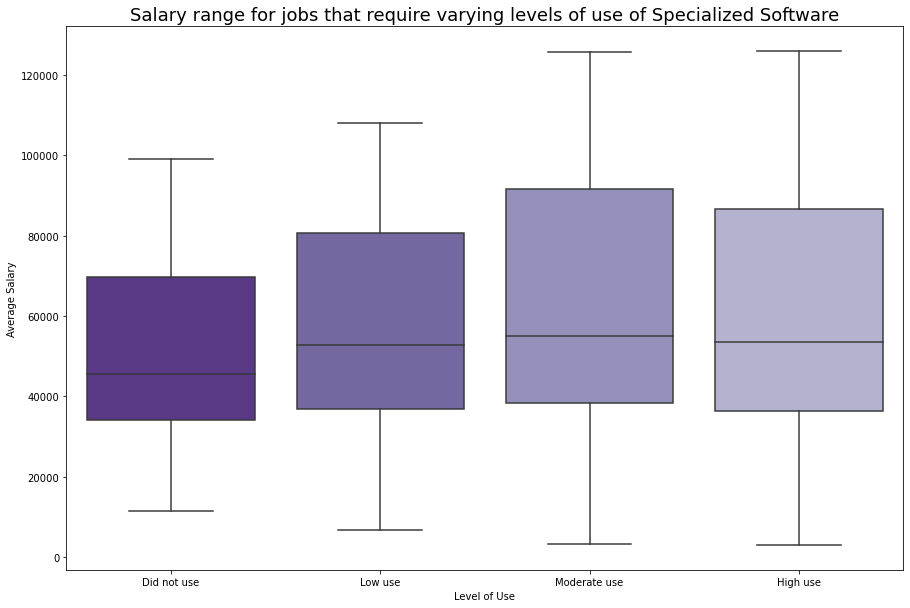

In [32]:
plt.figure(figsize=(15,10))
sns.set_palette(palette= 'Purples_r')
software_plot= sns.boxplot(x='Level of Use', y='Average Salary', data=software, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Salary range for jobs that require varying levels of use of Specialized Software', size= 18);

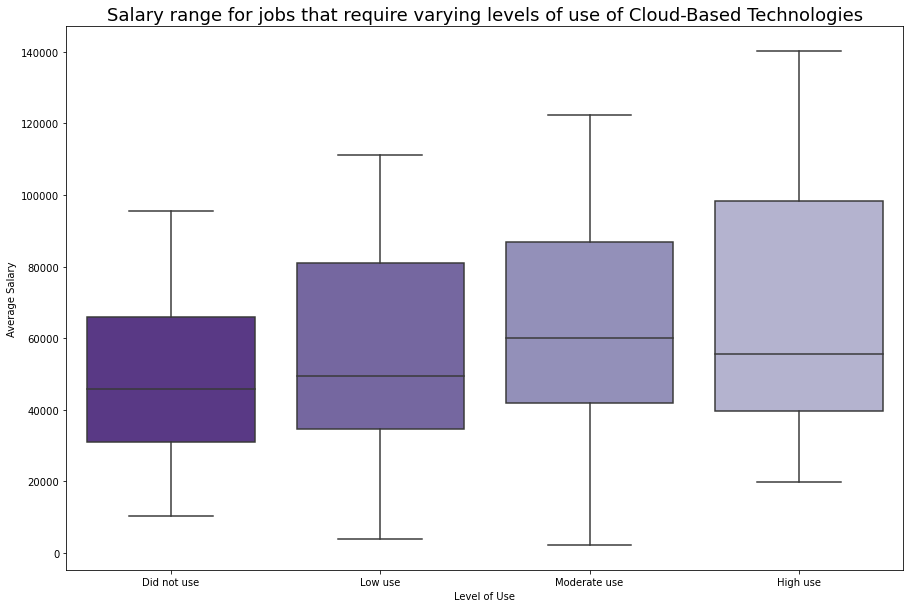

In [33]:
plt.figure(figsize=(15,10))
sns.set_palette(palette= 'Purples_r')
software_plot= sns.boxplot(x='Level of Use', y='Average Salary', data=cloud, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Salary range for jobs that require varying levels of use of Cloud-Based Technologies', size= 18);

<h5>In which industries are individuals who work with Artificial Intelligence likely to earn the highest salaries?<h5>

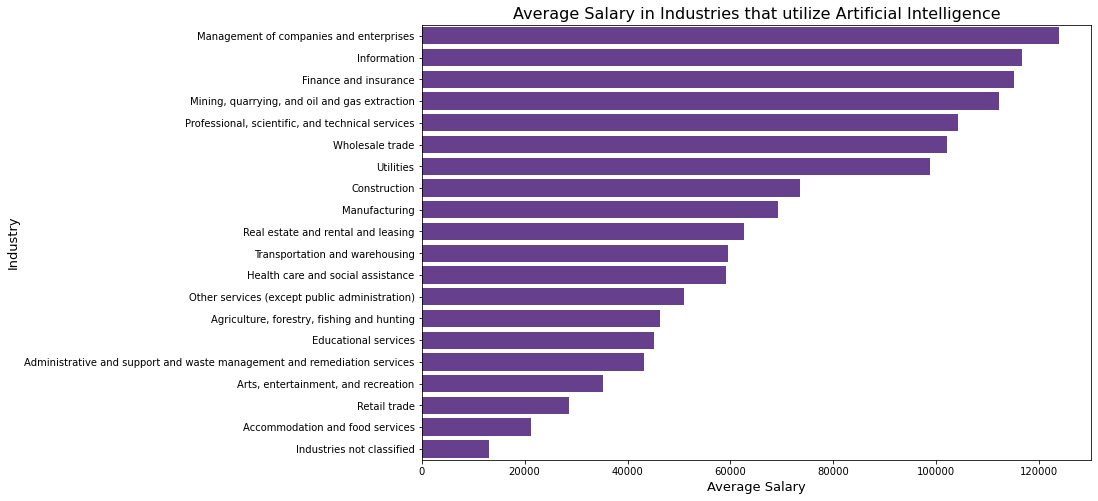

In [36]:
sns.set_palette(palette= 'Purples_r')
plt.figure(figsize= (12,8))
sns.barplot(y= Payroll_ai['Industry'], x= (Payroll_ai['Average Salary']), color='rebeccapurple');
plt.title('Average Salary in Industries that utilize Artificial Intelligence', size= 16);
plt.xlabel('Average Salary', size= 13);
plt.ylabel('Industry', size = 13);
plt.show()